<a href="https://colab.research.google.com/github/noah40povis/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/LS_DS_432_TensorFlow_Assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [2]:
import numpy as np
import tensorflow as tf 

data = np.load('/content/quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [18]:
X = data[0]

KeyError: ignored

In [3]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

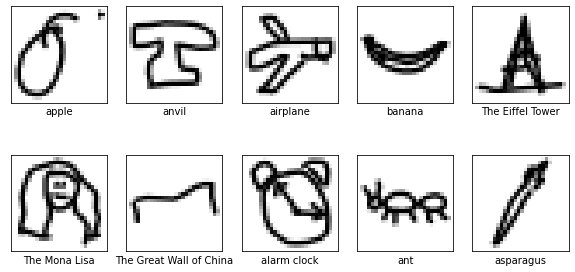

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [5]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [6]:
X.shape, y.shape

((100000, 784), (100000,))

In [7]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.33, shuffle= True)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(layers.Conv2D(465, 3, activation='relu', input_dim=784))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(400, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(300, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn  = model.fit(X,y, epochs=5, validation_split=.2)

ValueError: ignored

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(392,input_dim=784, activation='sigmoid')) # (outputs, shape, activation function)
model.add(Dense(196, activation='sigmoid'))
model.add(Dense(98, activation='sigmoid'))
model.add(Dense(98, activation='sigmoid'))
model.add(Dense(49, activation='sigmoid'))
model.add(Dense(24, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
results = model.fit(X,y, epochs=5, validation_split=.2)

Epoch 1/5
2500/2500 [==============================] - 5s 2ms/step - loss: 1.4594 - accuracy: 0.4955 - val_loss: 1.1166 - val_accuracy: 0.6497
Epoch 2/5
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9811 - accuracy: 0.6913 - val_loss: 0.8694 - val_accuracy: 0.7329
Epoch 3/5
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8406 - accuracy: 0.7370 - val_loss: 0.8108 - val_accuracy: 0.7467
Epoch 4/5
2500/2500 [==============================] - 6s 2ms/step - loss: 0.7872 - accuracy: 0.7539 - val_loss: 0.7870 - val_accuracy: 0.7509
Epoch 5/5
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7440 - accuracy: 0.7673 - val_loss: 0.7407 - val_accuracy: 0.7673


### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [ ]:
results.history #returns list of models returns each epoch


In [23]:
df

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.303025,1.726511,0.48810,1.327572,0
1,0.594212,1.157170,0.67845,1.000778,1
2,0.703112,0.924307,0.73140,0.863797,2
3,0.743563,0.810455,0.76090,0.768935,3
4,0.754412,0.772140,0.76470,0.750642,4
5,0.767950,0.736526,0.76830,0.735874,5
6,0.774525,0.715043,0.77590,0.704187,6
7,0.778363,0.698023,0.77030,0.710804,7
8,0.783512,0.683319,0.78355,0.686324,8
9,0.787575,0.668410,0.79375,0.653451,9


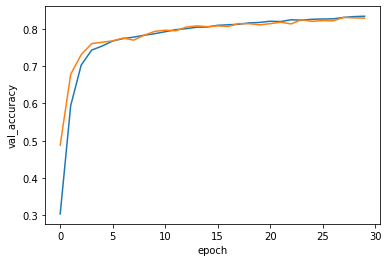

In [25]:
ax = sns.lineplot(x='epoch', y='accuracy', data=df)
ax = sns.lineplot(x='epoch', y='val_accuracy', data=df);

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


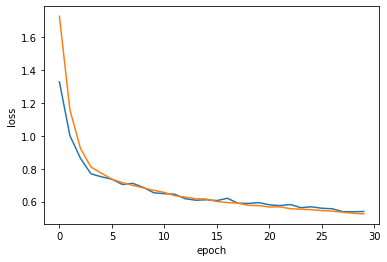

In [21]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(results.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

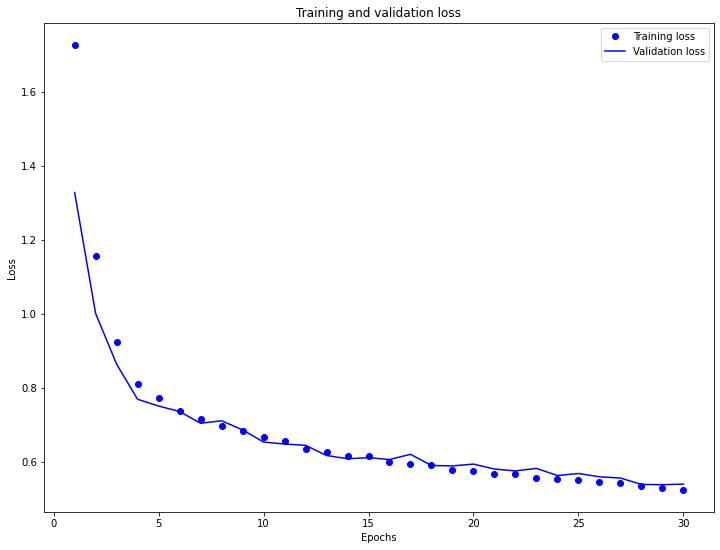

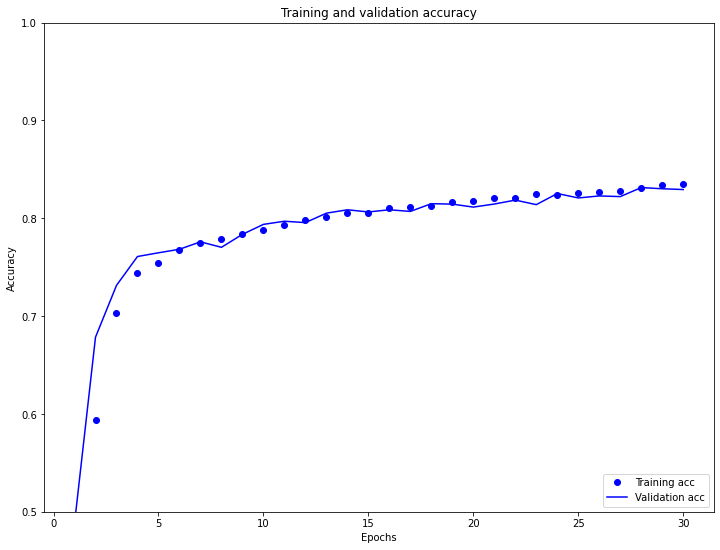

In [26]:
history_dict = results.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

### Looking at the graphs for both loss and accuracy I should have kept it to 3 epochs. I know this because it levels off at 3. 

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [ ]:
from tf.keras.optimizers import Adam

adam = Adam()

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

### sparse_categorical_crossentropy(...). sparse categorical cross entropy should be used when the classes are mutually exclusive.


### The loss function is used to optimize the model. This is the function that will get minimized by the optimizer. 

### First, SGD is not great for Deep Neural Networks. It also converges more slowly than other algorithms. It is also less capable of escaping locally optimal traps in the cost surface. It is good for shallow nets. Given a small enough learning rate, SGD always simply follows the gradient on the cost surface.

### Adam is one of the most popular optimization algorithms at present, largely because it provides both the smart learning rate annealing and momentum behaviors of the algorithms we've seen here thus far. Momentum techniques introduce information from past steps into the determination of the current step. In other words, descent in an algorithm using a momentum technique depends not just on the algo's current determination, but also on some of the steps it had taken in the recent past. 



## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)